In [47]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [48]:
runs_root = Path('../runs')
for c in runs_root.iterdir():
    print(c.name)

dqn_dense_ms_ec_eps0_smallrandoms
reinforce_ms100x_mediumrandoms
dqn_linkedqap_smallrandoms
reinforce_ms100x_smallrandoms
a2c_ms100x_mediumrandoms
dqn_dense_ms_ec_eps0_mediumrandoms
a2c_mediumrandoms
dqn_dense_ms_ec_eps0_rni_study


In [49]:
experiment_names = ["a2c_ms100x_mediumrandoms"]
paths = []
for experiment in experiment_names:
    paths += sorted((runs_root / experiment).iterdir())

In [50]:
import drlqap.experiment as exp

In [51]:
metadatas = [exp.load_metadata(path) for path in paths]

In [52]:
metadatas[0]

{'agent_type': 'a2c_ms100x',
 'agent_arguments': {'learning_rate': 0.0002},
 'training_task': 'medium_random_graphs',
 'training_steps': 30000,
 'seed': 1}

In [53]:
from drlqap.evaltools import load_float_txt
values = [load_float_txt(path / "value.txt") for path in paths]

In [124]:
metadata = [
    {
        'path': path,
        'seed': meta['seed'],
        'agent_type': meta['agent_type'],
        **meta['agent_arguments'],
    }
    for path, meta in zip(paths, metadatas)
]
meta_df = pd.DataFrame(metadata).fillna(-1) # default values == -1

In [125]:
meta_index = pd.MultiIndex.from_frame(meta_df)

In [126]:
df = pd.DataFrame(values, index = meta_index)

In [127]:
# Filter data manually here
#df = df.query('seed < 3 and learning_rate > 1e-5')

In [128]:
df

,,,,,,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
path,seed,agent_type,learning_rate,gnn_depth,mlp_depth,,,,,,,,,,,,,,,,,,,,,
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s1,1,a2c_ms100x,0.00020,-1.0,-1.0,55.767970,56.846410,67.055720,69.847046,60.921850,66.067350,57.013168,49.756991,58.272418,62.750365,...,57.047981,57.299465,56.686018,65.285542,57.083599,58.048659,54.359755,38.815499,55.589232,58.261970
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s2,2,a2c_ms100x,0.00020,-1.0,-1.0,56.686836,64.999871,59.213661,59.924793,58.179696,61.677036,64.059915,52.334428,73.564758,64.165410,...,58.949566,52.991999,59.118220,59.621432,55.612112,54.160752,52.814049,49.269946,59.564165,52.355776
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s3,3,a2c_ms100x,0.00020,-1.0,-1.0,63.027261,60.341001,56.316754,63.101858,60.002147,54.485904,58.235968,66.073920,63.149183,56.397609,...,58.524713,55.538842,54.287145,50.068442,53.923966,60.078444,56.268428,60.363424,54.412127,50.922772
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s4,4,a2c_ms100x,0.00020,-1.0,-1.0,60.797271,68.739039,55.722369,63.920381,59.468601,58.544580,70.045670,55.348317,59.088841,58.878159,...,56.492342,47.883139,52.989078,52.791029,63.525158,58.752746,67.283588,53.070269,52.304454,56.120595
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1,1,a2c_ms100x,0.00004,-1.0,-1.0,56.110544,56.846410,64.412978,66.601273,59.855553,66.067350,56.059444,52.843203,58.792774,62.098415,...,57.202551,55.006408,52.591529,67.234735,57.640021,57.512979,53.765587,38.543702,52.012379,61.326633
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md2,1,a2c_ms100x,0.00004,4.0,2.0,56.865747,62.869980,66.660506,68.846356,58.951199,64.190279,59.450079,53.199508,58.792774,63.534235,...,57.512262,54.168016,52.128647,63.104730,56.850038,55.711430,53.369581,37.372744,52.278219,56.840062
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md4,1,a2c_ms100x,0.00004,4.0,4.0,55.767970,56.846410,64.412978,67.577730,62.193410,66.860821,56.059444,52.843203,57.316993,62.098415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s2,2,a2c_ms100x,0.00004,-1.0,-1.0,56.686836,67.113476,59.916268,58.777788,58.179696,61.616207,64.059915,51.560028,74.853273,61.240929,...,55.998675,49.832049,58.152023,57.988607,51.924636,56.092879,46.413358,46.780510,53.416121,52.972370
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s3,3,a2c_ms100x,0.00004,-1.0,-1.0,61.103354,61.567431,51.327676,63.101858,60.002147,53.765325,60.608474,65.349054,62.389485,57.549072,...,55.596174,51.038745,50.621965,49.667987,50.767962,55.529964,51.581930,57.483191,50.643969,49.936248


In [129]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, keys, window):
    if type(keys) != list:
        keys = [keys]
    
    mean = aggregate(df, keys, window, 'mean')
    upper = aggregate(df, keys, window, 'max')
    lower = aggregate(df, keys, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        #plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        if len(keys) > 1:
            matching_indices = None
            for i, k in enumerate(keys):
                m = df.index.get_level_values(k) == col[i] 
                matching_indices = matching_indices & m if matching_indices is not None else m
        else:
            matching_indices = (df.index.get_level_values(keys[0]) == col)
        individuals = df[matching_indices].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=8, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

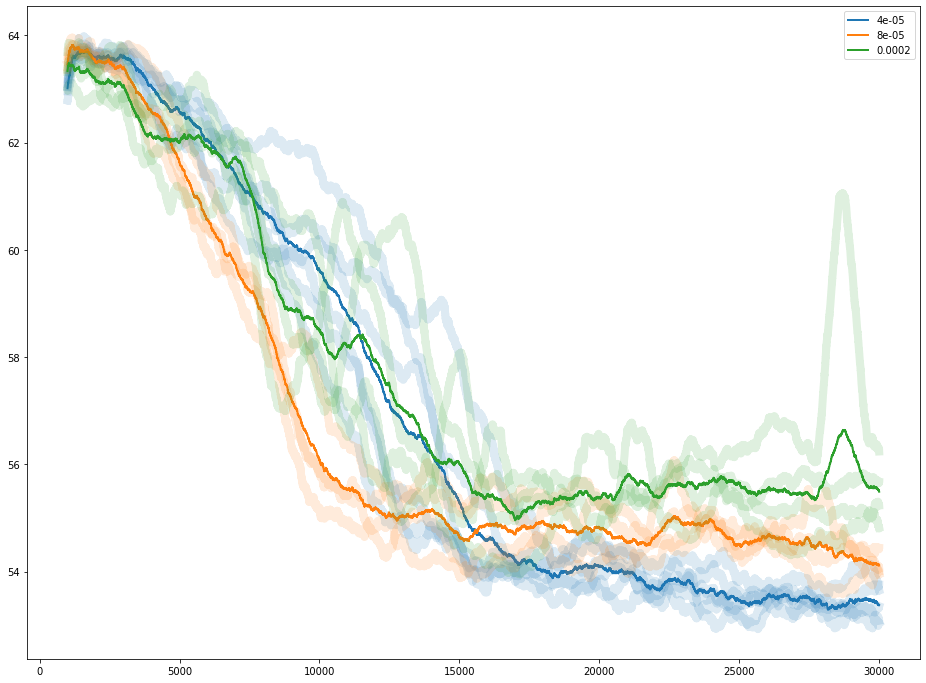

In [135]:
plt.figure(figsize=(16, 12))
generate_variation_plot(df, ['learning_rate'], 1000)